In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('flight_delays.csv')

In [3]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [4]:
data.shape

(100000, 9)

Доля задержанных рейсов 

In [4]:
YES = 0
for i in range(100000):
    if data['dep_delayed_15min'][i] == 'Y':
        YES += 1
print('Доля задержанных рейсов ко всем')
print(YES/100000)

Доля задержанных рейсов ко всем
0.19044


In [5]:
delay = []
for i in range(100000):
    if data['dep_delayed_15min'][i] == 'Y':
        delay.append(1)
    else:
        delay.append(0)
data['delay'] = delay

In [6]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,delay
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,1


In [7]:
delay = list(data['delay'])
dest = set(data['Dest'])
dest_set = list(dest)
destination = list(data['Dest'])

In [8]:
delay_destination = []
s = 0
for d in dest_set:
    for i in range(100000):
        if destination[i] == d:
            s = s + delay[i]
    delay_destination.append(s)
    s = 0

In [9]:
A = np.array(delay_destination)

In [10]:
for k in range(1,len (A)):
    i = k
    while i > 0 and A[i-1] > A[i]:
        tmp = A[i]
        A[i] = A[i-1]
        A[i-1] = tmp
        i = i - 1
print(A)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    2    2    2    2    2    2    2    2    2    2    2
    2    3    3    3    3    3    3    3    3    3    3    3    3    3
    3    3    3    4    4    4    4    4    4    4    4    4    4    4
    4    4    4    4    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    5    5    5    5    6    6    6    6    6    6
    6    6    6    6    6    6    7    7    7    7    7    7    7    7
    8    8    8    8    8    9    9    9    9    9    9    9    9    9
   10   10   10   10   10   11   11   11   11   11   11   11   12   12
   12   12   12   12   13   13   13   13   13   14   14   14   14   14
   15   15   15   16   16   17   17   17   18   18   18   18   19   19
   20   21   21   21   21   21   21   21   22   22   22   23   23   24
   24   25   26   26   26   27   27   30   31   31   31   32   34   34
   36 

In [12]:
print(delay_destination)

[3, 3, 11, 9, 5, 21, 18, 38, 173, 199, 5, 1, 5, 285, 102, 108, 50, 2, 47, 25, 2, 520, 170, 12, 12, 44, 23, 3, 87, 3, 464, 69, 9, 656, 5, 4, 21, 0, 11, 0, 7, 0, 4, 7, 5, 214, 18, 1, 6, 19, 1, 0, 9, 46, 36, 287, 9, 7, 12, 91, 2, 6, 30, 12, 274, 9, 34, 178, 2, 3, 1, 5, 8, 15, 168, 3, 6, 11, 21, 221, 525, 1072, 21, 14, 9, 111, 17, 13, 4, 26, 21, 291, 53, 27, 3, 7, 1, 83, 41, 13, 7, 11, 5, 158, 8, 2, 21, 1, 198, 4, 3, 342, 4, 52, 3, 116, 4, 4, 256, 3, 94, 0, 4, 24, 21, 26, 85, 69, 34, 22, 15, 1, 10, 0, 409, 40, 0, 70, 4, 15, 32, 6, 10, 318, 6, 44, 9, 6, 226, 95, 155, 0, 1, 190, 355, 19, 5, 6, 3, 0, 10, 325, 20, 39, 12, 8, 10, 2, 17, 121, 308, 43, 6, 379, 1, 81, 1, 4, 47, 22, 40, 70, 2, 11, 17, 83, 6, 66, 9, 5, 584, 31, 0, 397, 13, 173, 16, 3, 6, 18, 47, 6, 43, 5, 5, 16, 13, 3, 11, 1, 66, 0, 4, 5, 61, 1, 31, 58, 231, 0, 5, 7, 26, 14, 1, 4, 10, 1, 14, 8, 63, 5, 12, 1, 364, 9, 4, 0, 18, 106, 4, 7, 140, 1, 1, 1281, 24, 5, 172, 71, 2, 5, 3, 2, 5, 74, 60, 53, 96, 110, 23, 60, 14, 50, 1, 4, 11, 3,

In [13]:
index = []
search = [1281, 1072, 656, 584, 525]
for j in search:
    for i in range(len(delay_destination)):
        if delay_destination[i] == j:
            index.append(i)

In [14]:
index

[245, 81, 33, 190, 80]

Топ 5 напрвалений, для которых чаще всего происходят задержки'

In [15]:
print('Топ 5 напрвалений, для которых чаще всего происходят задержки')
for i in index:
    print(dest_set[i])

Топ 5 напрвалений, для которых чаще всего происходят задержки
ATL
ORD
DFW
EWR
LAX


In [16]:
delay = list(data['delay'])
UC = set(data['UniqueCarrier'])
UC_set = list(UC)
UniqueCarrier = list(data['UniqueCarrier'])

In [17]:
delay_UC = []
s = 0
for d in UC_set:
    for i in range(100000):
        if UniqueCarrier[i] == d:
            s = s + delay[i]
    delay_UC.append(s)
    s = 0

In [18]:
A = np.array(delay_UC)

In [19]:
for k in range(1,len (A)):
    i = k
    while i > 0 and A[i-1] > A[i]:
        tmp = A[i]
        A[i] = A[i-1]
        A[i-1] = tmp
        i = i - 1
print(A)

[  18   33   64  156  156  196  393  478  541  736  788  808 1026 1075
 1082 1085 1277 1322 1373 1448 1770 3219]


In [20]:
print(delay_UC)

[33, 1085, 64, 3219, 196, 1770, 1026, 541, 1448, 156, 1075, 1277, 393, 18, 736, 1373, 156, 808, 788, 478, 1082, 1322]


In [21]:
index = []
search = [18,  33,   64,  156, 196,  393,  478,  541,  736]
for j in search:
    for i in range(len(delay_UC)):
        if delay_UC[i] == j:
            index.append(i)

In [22]:
index

[13, 0, 2, 9, 16, 4, 12, 19, 7, 14]

Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [23]:
print('Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы')
for i in index:
    print(UC_set[i])

Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы
AQ
HA
TZ
F9
DH
HP
B6
YV
AS
FL


In [26]:
delay = list(data['delay'])
origin_s = set(data['Origin'])
origin_set = list(origin_s)
origin = list(data['Origin'])

In [27]:
delay_origin = []
s = 0
for d in origin_set:
    for i in range(100000):
        if origin[i] == d:
            s = s + delay[i]
    delay_origin.append(s)
    s = 0

In [28]:
A = np.array(delay_origin)
print(A)
for k in range(1,len (A)):
    i = k
    while i > 0 and A[i-1] > A[i]:
        tmp = A[i]
        A[i] = A[i-1]
        A[i-1] = tmp
        i = i - 1
print(A)

[   0    0    7    9    3   22   21   13  148  211    1    1    2  282
   95   35   71   33    1   16    4  546   14  130   20   10   27    3
   59    1  491   46   10  902    8    3   10    7    3    1    2    0
    3    3    0  181   17    5    2   22    2    1   10   53    4  362
   28    4   12   79    1    6   26    6  304    3   35  152    1    7
    0    5   12   12  154    3    2   16   19  190  552 1254   38    7
    6   13   85   13    1   17   21  401   49    9    6    6    2   80
   30    2   10    9    4  190    6    9   10    0  192    2    0  322
    3   33    0  104    6    0  288    1  118    0    2   17   91   18
    6   49   30   17   14    1    6    2  492   28    0   64    0   28
   11   13    9  326    6   36    5    8  343  109  138    2    0  160
  388    1   10    3    3    0    8  360   18   43   12    7    2    2
    6  332   86   31    2  360    0   52    2    3   25    9   36   50
   10    1    8   58    7   57    4    8  538   28    0  350   14  149
    9 

In [40]:
print(delay_origin)

[0, 0, 7, 9, 3, 22, 21, 13, 148, 211, 1, 1, 2, 282, 95, 35, 71, 33, 1, 16, 4, 546, 14, 130, 20, 10, 27, 3, 59, 1, 491, 46, 10, 902, 8, 3, 10, 7, 3, 1, 2, 0, 3, 3, 0, 181, 17, 5, 2, 22, 2, 1, 10, 53, 4, 362, 28, 4, 12, 79, 1, 6, 26, 6, 304, 3, 35, 152, 1, 7, 0, 5, 12, 12, 154, 3, 2, 16, 19, 190, 552, 1254, 38, 7, 6, 13, 85, 13, 1, 17, 21, 401, 49, 9, 6, 6, 2, 80, 30, 2, 10, 9, 4, 190, 6, 9, 10, 0, 192, 2, 0, 322, 3, 33, 0, 104, 6, 0, 288, 1, 118, 0, 2, 17, 91, 18, 6, 49, 30, 17, 14, 1, 6, 2, 492, 28, 0, 64, 0, 28, 11, 13, 9, 326, 6, 36, 5, 8, 343, 109, 138, 2, 0, 160, 388, 1, 10, 3, 3, 0, 8, 360, 18, 43, 12, 7, 2, 2, 6, 332, 86, 31, 2, 360, 0, 52, 2, 3, 25, 9, 36, 50, 10, 1, 8, 58, 7, 57, 4, 8, 538, 28, 0, 350, 14, 149, 9, 5, 1, 2, 15, 45, 13, 39, 3, 6, 9, 6, 0, 6, 2, 45, 2, 4, 2, 41, 6, 21, 56, 213, 15, 4, 17, 1, 1, 16, 3, 14, 41, 5, 2, 21, 1, 332, 8, 8, 1, 17, 73, 1, 4, 118, 1, 2, 1506, 24, 1, 207, 53, 2, 9, 1, 1, 4, 78, 54, 52, 67, 32, 78, 70, 23, 1, 1, 21, 2, 11, 2, 41, 3, 8, 2, 0, 

In [36]:
A[279:289][::-1]

array([1506, 1254,  902,  575,  552,  546,  538,  492,  491,  401])

In [37]:
A[279:289]

array([ 401,  491,  492,  538,  546,  552,  575,  902, 1254, 1506])

In [38]:
index = []
search = A[279:289][::-1]
for j in search:
    for i in range(len(delay_origin)):
        if delay_origin[i] == j:
            index.append(i)
print(index)

[244, 81, 33, 273, 80, 21, 190, 134, 30, 91]


Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [35]:
print('Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки')
for i in index:
    print(dest_set[i])

Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
FLO
ORD
DFW
DEN
LAX
LAS
EWR
IAH
PHX
DTW


In [41]:
month = []
a = 0
for i in range(100000):
        month.append(data['Month'].iloc[i][2:4])
   
data['month'] = month

In [42]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,delay,month
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,0,8
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,0,4
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,0,9
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,0,11
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,1,10


In [43]:
delay_season = np.zeros(4)

In [44]:
for i in range(100000):
    if (data['month'].iloc[i] == '12' or data['month'].iloc[i] == '1' or data['month'].iloc[i] == '2') and (data['delay'].iloc[i] == 1):
        delay_season[0] += 1
    if (data['month'].iloc[i] == '3' or data['month'].iloc[i] == '4' or data['month'].iloc[i] == '5') and (data['delay'].iloc[i] == 1):
        delay_season[1] += 1
    if (data['month'].iloc[i] == '6' or data['month'].iloc[i] == '7' or data['month'].iloc[i] == '8') and (data['delay'].iloc[i] == 1):
        delay_season[2] += 1
    if (data['month'].iloc[i] == '9' or data['month'].iloc[i] == '10' or data['month'].iloc[i] == '11') and (data['delay'].iloc[i] == 1):
        delay_season[3] += 1
        

In [45]:
delay_season

array([4849., 4295., 5723., 4177.])

Задержки по сезонам года

In [46]:
print("Количество задержек зимой")
print(delay_season[0])
print("Количество задержек весной")
print(delay_season[1])
print("Количество задержек летом")
print(delay_season[2])
print("Количество задержек осенью")
print(delay_season[3])

Количество задержек зимой
4849.0
Количество задержек весной
4295.0
Количество задержек летом
5723.0
Количество задержек осенью
4177.0


Таким образом, больше всего задержек летом

In [47]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,delay,month
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,0,8
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,0,4
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,0,9
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,0,11
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,1,10


In [48]:
delay = list(data['delay'])
dist_s = set(data['Distance'])
dist_set = list(dist_s)
dist = list(data['Distance'])

In [49]:
delay_distance = []
s = 0
for d in dist_set:
    for i in range(100000):
        if dist[i] == d:
            s = s + delay[i]
    delay_distance.append(s)
    s = 0

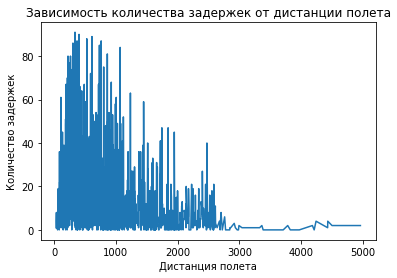

In [50]:
plt.plot(dist_set, delay_distance)
plt.title('Зависимость количества задержек от дистанции полета')
plt.xlabel('Дистанция полета')
plt.ylabel('Количество задержек')
plt.show()